In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# LOAD DATASET

In [3]:
bankchurn = pd.read_csv("C:\\Users\\welcome\\Desktop\\churn\\BankChurners.csv")
bankchurn = bankchurn.drop(['CLIENTNUM'], axis = 1)
bankchurn.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#  EXPLOARTARY DATA ANALYSIST

## DESCRIBTIVE STATICSTICS

In [4]:
bankchurn.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [5]:
bankchurn.describe(include = 'O')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


## PROPORTION OF TARGET CLASS

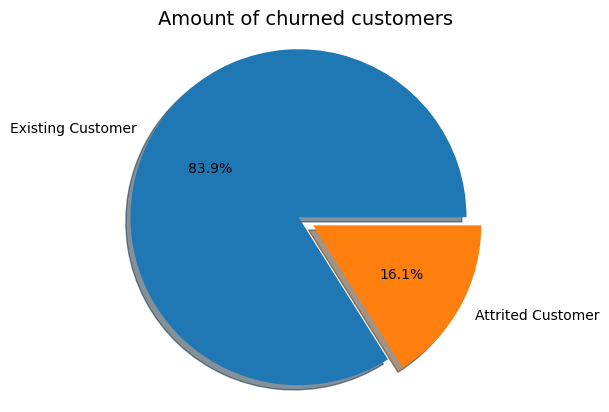

Total number of customers: 10127
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


In [6]:
target = bankchurn["Attrition_Flag"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(target, labels = target.index, autopct = '%1.1f%%', shadow = True, explode = [0.1, 0])
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize = 14)
plt.show()
print('Total number of customers:', bankchurn['Attrition_Flag'].count())
print(bankchurn['Attrition_Flag'].value_counts())

## DATA CLEANING

In [7]:
bankchurn=bankchurn.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)#drop last two column becouse no use

In [8]:
bankchurn.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [9]:
bankchurn.shape

(10127, 20)

In [10]:
listItem=[]
for col in bankchurn.columns :
    listItem.append([col, bankchurn[col].dtype, bankchurn[col].isna().sum(), round((bankchurn[col].isna()/len(bankchurn[col]))*100,2),
                     bankchurn[col].nunique(), list(bankchurn[col].drop_duplicates().sample(2).values)]);

bankchurnDesc=pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                    data=listItem)
bankchurnDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Attrition_Flag,object,0,0 0.0 1 0.0 2 0.0 3 ...,2,"[Attrited Customer, Existing Customer]"
1,Customer_Age,int64,0,0 0.0 1 0.0 2 0.0 3 ...,45,"[34, 26]"
2,Gender,object,0,0 0.0 1 0.0 2 0.0 3 ...,2,"[M, F]"
3,Dependent_count,int64,0,0 0.0 1 0.0 2 0.0 3 ...,6,"[0, 3]"
4,Education_Level,object,0,0 0.0 1 0.0 2 0.0 3 ...,7,"[College, Graduate]"
5,Marital_Status,object,0,0 0.0 1 0.0 2 0.0 3 ...,4,"[Single, Married]"
6,Income_Category,object,0,0 0.0 1 0.0 2 0.0 3 ...,6,"[$40K - $60K, Less than $40K]"
7,Card_Category,object,0,0 0.0 1 0.0 2 0.0 3 ...,4,"[Platinum, Blue]"
8,Months_on_book,int64,0,0 0.0 1 0.0 2 0.0 3 ...,44,"[51, 29]"
9,Total_Relationship_Count,int64,0,0 0.0 1 0.0 2 0.0 3 ...,6,"[2, 6]"


In [11]:
counts=bankchurn.Attrition_Flag.value_counts()
perc_churn=(counts[1]/(counts[0]+counts[1]))*100
duplicates=len(bankchurn[bankchurn.duplicated()])
missing_values=bankchurn.isnull().sum().sum()
types=bankchurn.dtypes.value_counts()

C:\Users\welcome\AppData\Local\Temp\ipykernel_11956\1697273014.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  perc_churn=(counts[1]/(counts[0]+counts[1]))*100


In [12]:
print("Churn Rate = %.1f %%"%(perc_churn))
print('Number of Missing Values: %d'%(missing_values))
print('Number of Duplicate Entries: %d'%(duplicates))
print('number of customers: %d'%(bankchurn.shape[0]))
print('number of Features: %d'%(bankchurn.shape[1]))
print('Data Types and Frequency in Dataset:')
print(types)

Churn Rate = 16.1 %
Number of Missing Values: 0
Number of Duplicate Entries: 0
number of customers: 10127
number of Features: 20
Data Types and Frequency in Dataset:
int64      9
object     6
float64    5
Name: count, dtype: int64


## Feature Scaling

In [13]:
bankchurn_num = bankchurn.select_dtypes(include=['int','float'])
bankchurn_num.columns.tolist()

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [14]:
stand_var = ['Customer_Age', 'Months_on_book', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
norm_var = ['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon',
            'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Avg_Utilization_Ratio']

for stand in bankchurn[stand_var]:
    bankchurn[stand] = StandardScaler().fit_transform(bankchurn[stand].values.reshape(len(bankchurn), 1))
for norm in bankchurn[norm_var]:
    bankchurn[norm] = MinMaxScaler().fit_transform(bankchurn[norm].values.reshape(len(bankchurn), 1))

## Train-Test Split

In [22]:
X = bankchurn.drop(['Attrition_Flag'], axis = 1).astype(float).values
y = bankchurn['Attrition_Flag'].astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

ValueError: could not convert string to float: 'M'

# DATA PREPROCESSING

## REMOVE CREDIT LIMIT

In [23]:
bankchurn = bankchurn.drop('Credit_Limit', axis = 1)
bankchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  float64
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  float64
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  float64
 9   Total_Relationship_Count  10127 non-null  float64
 10  Months_Inactive_12_mon    10127 non-null  float64
 11  Contacts_Count_12_mon     10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  float64
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

# CATERGORICAL ENCODING

In [24]:
# Ordinal Encoding
LE = LabelEncoder()
for cat in list(['Attrition_Flag', 'Education_Level', 'Income_Category', 'Card_Category']):
    bankchurn[cat] = LE.fit_transform(bankchurn[cat])

# Nominal Encoding
nominal_cats = ['Gender', 'Marital_Status']
for cat in nominal_cats:
    onehot = pd.get_dummies(bankchurn[cat], prefix = cat)
    bankchurn = bankchurn.join(onehot)

bankchurn = bankchurn.drop(['Gender', 'Marital_Status'], axis = 1)

## CHECKING CORRELATION

<Axes: >

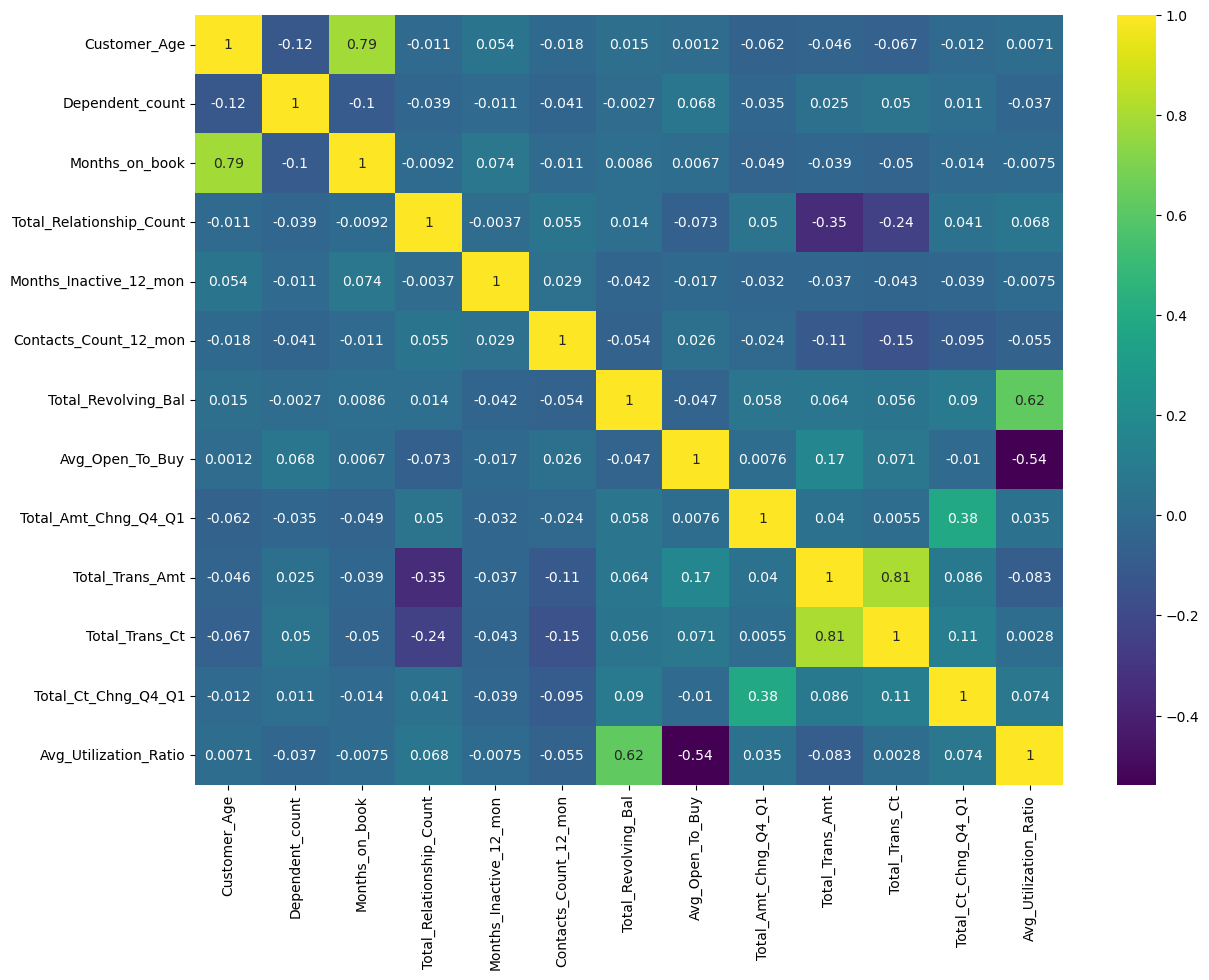

In [25]:
dfk = bankchurn.select_dtypes(include = ['int64', 'float64']) # memilih kolom numerik
k = len(dfk.columns)
cm = dfk.corr()
plt.figure(figsize = (14, 10))
sns.heatmap(cm, annot = True, cmap = 'viridis')

## NORMALITY TEST

In [26]:
numeric_uji = bankchurn[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                        'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
                        'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']].sample(n = 50, random_state = 21)
numeric_uji.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7061,0.208826,1.0,0.008965,0.6,0.166667,0.333333,0.777116,0.062035,0.181631,0.171025,-0.164400,0.129277,0.477477
9075,0.583058,0.6,0.134183,0.0,0.333333,0.166667,0.000000,1.000000,0.239623,0.457661,1.369381,-0.042938,0.000000
7608,-0.789126,0.4,-1.118005,1.0,0.500000,0.166667,0.803735,0.187408,0.256403,0.221208,0.517281,1.099563,0.238238
1384,-0.040662,0.8,0.008965,0.4,0.500000,0.666667,0.389750,0.013163,0.195172,0.033604,-1.357340,-0.261357,0.682683
6871,-0.414894,0.6,-0.491911,1.0,0.500000,0.500000,0.000000,0.054878,0.189873,0.131078,-0.760870,-1.021624,0.000000


In [27]:
nilai_statistik = list()
p_value = list()
hasil = list()
for i in numeric_uji:
    ns, pv = stats.shapiro(numeric_uji[i])
    hsl = 'normal' if pv > .05 else 'tidak normal'
    nilai_statistik.append(ns)
    p_value.append(pv)
    hasil.append(hsl)

uji = pd.DataFrame(nilai_statistik, index = numeric_uji.columns, columns = ['nilai statistik'])
uji['p-value'] = p_value
uji['sig lvl'] = 0.05
uji['hasil uji'] = hasil
uji

,nilai statistik,p-value,sig lvl,hasil uji
Customer_Age,0.960317,9.165799e-02,0.05,normal
Dependent_count,0.921909,2.765878e-03,0.05,tidak normal
Months_on_book,0.957837,7.215663e-02,0.05,normal
Total_Relationship_Count,0.922994,3.030203e-03,0.05,tidak normal
Months_Inactive_12_mon,0.796415,7.256265e-07,0.05,tidak normal
Contacts_Count_12_mon,0.924277,3.377886e-03,0.05,tidak normal
Total_Revolving_Bal,0.892568,2.755560e-04,0.05,tidak normal
Avg_Open_To_Buy,0.743039,5.350661e-08,0.05,tidak normal
Total_Amt_Chng_Q4_Q1,0.898228,4.201505e-04,0.05,tidak normal
Total_Trans_Amt,0.759301,1.139757e-07,0.05,tidak normal


# IMBALANCED DATASET

In [28]:
smote = SMOTE(random_state = 0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print('Before SMOTE')
print(pd.DataFrame(y_train).value_counts())
print('After SMOTE')
print(pd.DataFrame(y_resampled).value_counts())

NameError: name 'X_train' is not defined

# DATA MODELLING

## 1.LOGISTIC REGRESSION MODEL

In [29]:
# Train model
log_model = LogisticRegression().fit(X_resampled, y_resampled)

# Predict
log_y_test_pred = log_model.predict(X_test)

# Performance
print('Accuracy:', accuracy_score(y_test, log_y_test_pred))
print('Precision:', precision_score(y_test, log_y_test_pred, average = 'macro'))
print('Recall/Sensitivity:', recall_score(y_test, log_y_test_pred, average = 'macro'))

NameError: name 'X_resampled' is not defined

In [21]:
# Form confusion matrix as a DataFrame
confusion_matrix_bankchurn = pd.DataFrame((confusion_matrix(y_test, log_y_test_pred)),
                                   ('Existing Customer', 'Atrited Customer'),
                                   ('Existing Customer', 'Atrited Customer'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_bankchurn, annot = True, annot_kws = {'size' : 14}, fmt = 'd', cmap = 'YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation = 0, ha = 'right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation = 0, ha = 'center', fontsize = 14)

plt.title('Confusion Matrix for Logistic Regression\n', fontsize = 18, color = 'darkblue')
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label',fontsize = 14)
plt.show()

NameError: name 'y_test' is not defined

## 2.DECISION TREE CLASSIFIER

In [36]:
tree_clf = Pipeline([('preprocessor', preprocessor),
                     ('tree', DecisionTreeClassifier())])
                       
# Evaluate
metrics = evaluate_clf(tree_clf,'Decision tree')
model_metrics = model_metrics.append(metrics, ignore_index=True)

NameError: name 'Pipeline' is not defined

## 3.RAMDOM FOREST CLASSIFIER

In [39]:
# Train model
rf_model = RandomForestClassifier(random_state = 42).fit(X_resampled, y_resampled)

# Predict
rf_y_test_pred = rf_model.predict(X_test)

# Performance
print('Accuracy:', accuracy_score(y_test, rf_y_test_pred))
print('Precision:', precision_score(y_test, rf_y_test_pred, average = 'macro'))
print('Recall/Sensitivity:', recall_score(y_test, rf_y_test_pred, average = 'macro'))

Accuracy: 0.9550839091806516
Precision: 0.9158161806746712
Recall/Sensitivity: 0.9188900468525287


## 4.NAIVE BAYES CLASSIFIER

# MODEL EVALUATION

## ACCURACY

In [40]:
bankchurn.acc_test.sort_values(ascending=False)

AttributeError: 'DataFrame' object has no attribute 'acc_test'

## F1-SCORE

In [41]:
bankchurn.f1.sort_values(ascending=False)

AttributeError: 'DataFrame' object has no attribute 'f1'

## TRAINING TIME

In [42]:
bankchurn.training_time.sort_values(ascending=True)

AttributeError: 'DataFrame' object has no attribute 'training_time'